In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
N1 = 100
N2 = 200
np.random.seed(10)
mean1, mean2, std1, std2 = 1, 0, 0.5, 0.5
class1 = np.random.normal(loc=[mean1, mean2], scale=[std1, std2], size=(N1, 2))
out1 = np.zeros(N1)

mean3, mean4, std3, std4 = 3, -1, 0.5, 0.6
class2 = np.random.normal(loc=[mean3, mean4], scale=[std3, std4], size=(N2, 2))
out2 = np.ones(N2)

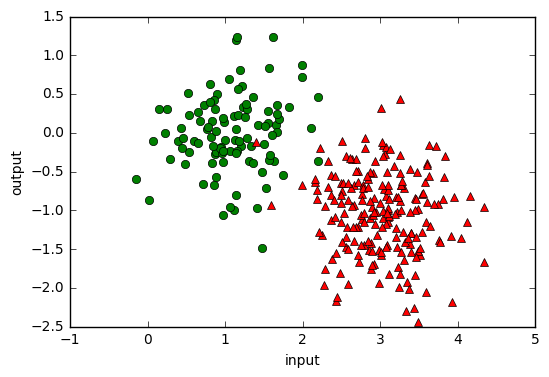

In [39]:
plt.plot(class1[:,0], class1[:,1], 'go')
plt.plot(class2[:,0], class2[:,1], 'r^')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

In [40]:
X = np.append(class1, class2,axis=0)
T = np.append(out1, out2)
_, size = X.shape
size

2

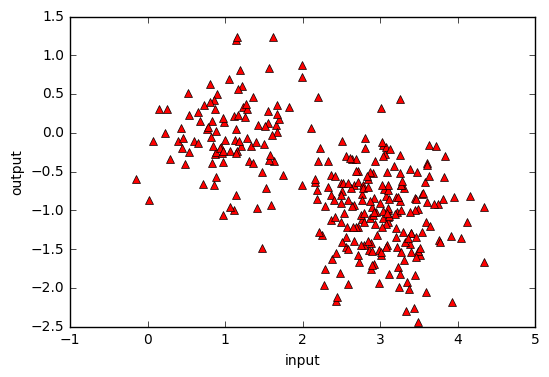

In [41]:
plt.plot(X[:,0], X[:,1], 'r^')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

In [58]:
#Fisher model: direct calculate
def average(X, N, start_idx):
    _, size = X.shape
    sum_all = np.zeros(size)
    for i in range(N):
        sum_all = np.add(sum_all, X[start_idx + i])
    return np.divide(1, N) * sum_all
def Sw(X, N1, N2, m1, m2):
    result = 0
    for i in range(N1):
        sub = np.subtract(X[i], m1)
        result += sub.dot(np.transpose(sub))
    for i in range(N1, N1 + N2):
        sub = np.subtract(X[i], m2)
        result += sub.dot(np.transpose(sub))
    return result
def boundary(W, w0, x):
    return -1 * np.divide(1, W[1]) * np.add(W[0] * x, w0)
def predict(W, w0, x):
    return np.transpose(W).dot(x) + w0

In [59]:
m1 = average(X, N1, 0)
m2 = average(X, N2, N1)
m = np.divide(1, N1 + N2) * (np.add(N1 * m1, N2 * m2))
Sb = np.subtract(m2, m1).dot(np.transpose(np.subtract(m2, m1)))
Sw = Sw(X, N1, N2, m1, m2)
W = N * np.subtract(m1, m2) * np.divide(1, Sw + Sb * N1 * N2 /(N1 + N2))
w0 = -1 * np.transpose(W).dot(m)

-0.147551664481
4.33995515399
-5.43377576696
3.0307817786
[-0.41259425  0.2187379 ]
1.1276937083
0.518626301621
-0.444344132686


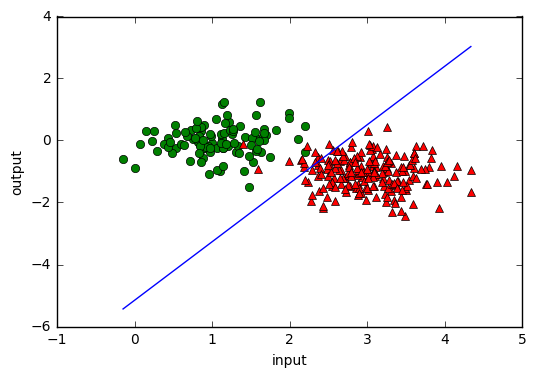

In [68]:
#for plot
xMin = np.amin(X, axis=0)[0]
xMax = np.amax(X, axis=0)[0]
yMin = boundary(W, w0, xMin)
yMax = boundary(W, w0, xMax)
plt.plot(class1[:,0], class1[:,1], 'go')
plt.plot(class2[:,0], class2[:,1], 'r^')
plt.plot([xMin, xMax], [yMin, yMax])
plt.xlabel('input')
plt.ylabel('output')
plt.show()

In [67]:
np.amin(X)
np.amax(X, axis=0)

array([ 4.33995515,  1.23382553])

In [49]:
w0

1.1276937083024561